In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  sqlalchemy
import  pymysql


In [121]:
from sqlalchemy import create_engine

engine = create_engine("mysql+pymysql://" + "root" + ":" + "2000" + "@" + "localhost" + ":" + "3306" + "/" + "invsto" + "?" + "charset=utf8mb4")
conn = engine.connect()



In [124]:
excel_file = pd.ExcelFile('HINDALCO_1.xlsx')
excel_dataframe = pd.read_excel("HINDALCO_1.xlsx")
excel_dataframe.to_sql("hind", conn, if_exists="replace")


1215

In [6]:
excel_dataframe = excel_dataframe.set_index(pd.DatetimeIndex(excel_dataframe['datetime'].values))
excel_dataframe

,datetime,close,high,low,open,volume,instrument
2014-01-24,2014-01-24,114.00,115.35,113.00,113.15,5737135.0,HINDALCO
2014-01-27,2014-01-27,111.10,112.70,109.30,112.00,8724577.0,HINDALCO
2014-01-28,2014-01-28,113.80,115.00,109.75,110.00,4513345.0,HINDALCO
2014-01-29,2014-01-29,111.75,114.75,111.15,114.50,4713458.0,HINDALCO
2014-01-30,2014-01-30,108.10,110.70,107.60,110.20,5077231.0,HINDALCO
...,...,...,...,...,...,...,...
2018-12-21,2018-12-21,224.00,227.45,221.80,224.25,6933691.0,HINDALCO
2018-12-24,2018-12-24,217.85,224.00,216.95,224.00,4667022.0,HINDALCO
2018-12-26,2018-12-26,218.60,219.80,212.90,213.85,6554865.0,HINDALCO
2018-12-27,2018-12-27,220.60,223.90,219.60,221.40,7947144.0,HINDALCO


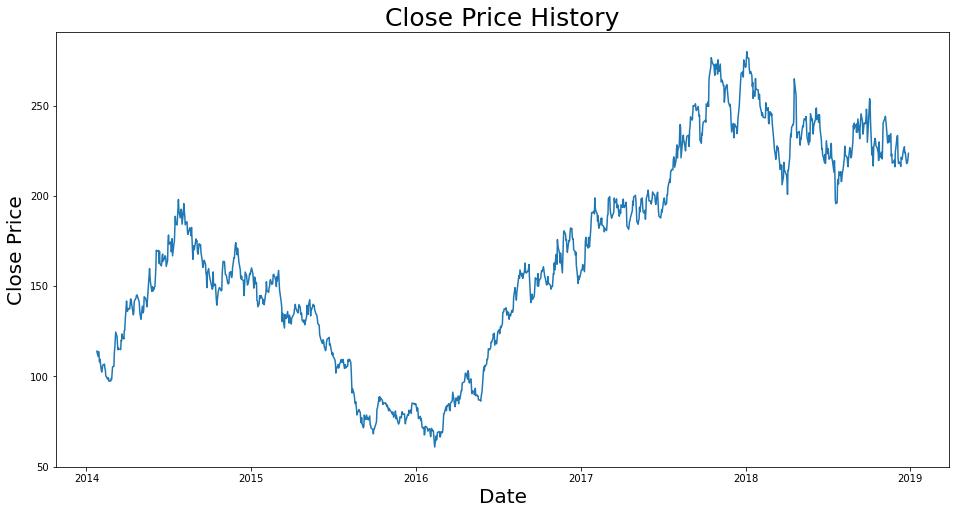

In [7]:
#visually show the close price

plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize= 25)
plt.plot(excel_dataframe['close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize = 20)
plt.show()

In [73]:
def sma(excel_dataframe , period = 30, column = 'close'):
    return excel_dataframe[column].rolling(window = period).mean()


# sma for 50 and 100 for buying and selling on crossover works fine

In [90]:
excel_dataframe['sma50'] = sma(excel_dataframe, 50)
excel_dataframe['sma100'] = sma(excel_dataframe, 100)


In [75]:
#get the buy and sell signals

excel_dataframe['Signal'] = np.where(excel_dataframe['sma50'] < excel_dataframe['sma100'], 1 ,0 )
excel_dataframe['Position'] = excel_dataframe['Signal'].diff()
excel_dataframe['Buy'] = np.where(excel_dataframe['Position'] == 1, excel_dataframe['close'] ,np.NAN )
excel_dataframe['Sell'] = np.where(excel_dataframe['Position'] == -1, excel_dataframe['close'] ,np.NAN )


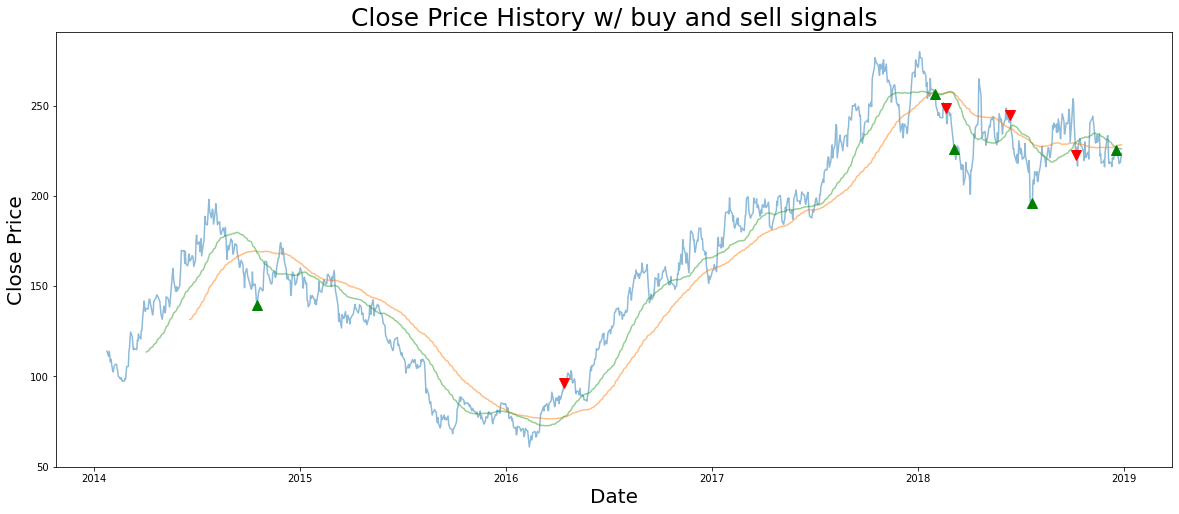

In [84]:
#visually show the close price with the sma and buy and sell signal

plt.figure(figsize=(20,8))
plt.title('Close Price History w/ buy and sell signals', fontsize= 25)
plt.plot(excel_dataframe['close'], alpha = 0.5 , label = 'close')
plt.plot(excel_dataframe['sma100'], alpha = 0.5 , label = 'sma100')
plt.plot(excel_dataframe['sma50'], alpha = 0.5 , label = 'sma50')
plt.plot(excel_dataframe.index, excel_dataframe['Buy'], alpha = 1 , label = 'Buy signal', marker = '^', color = 'green', markersize = 10)
plt.plot(excel_dataframe.index, excel_dataframe['Sell'], alpha = 1 , label = 'Sell signal', marker = 'v', color = 'red' ,markersize = 10)

plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize = 20)
plt.show()

In [53]:
df_buy = excel_dataframe.dropna(subset = 'Buy')[['Buy']].reset_index().rename(columns = {'index': 'BuyDate'})
df_sell = excel_dataframe.dropna(subset = 'Sell')[['Sell']].reset_index().rename(columns = {'index': 'SellDate'})
df_sell

df_merge_50_100 = pd.concat([df_buy,df_sell],axis = 1)


df_merge_50_100['return'] = (df_merge_50_100['Sell'] / df_merge_50_100['Buy'] - 1) * 100
df_merge_50_100

,BuyDate,Buy,SellDate,Sell,return
0,2014-10-17,139.45,2016-04-13,96.30,-30.942990
1,2018-02-01,256.25,2018-02-20,248.80,-2.907317
2,2018-03-06,225.85,2018-06-14,244.75,8.368386
3,2018-07-23,196.15,2018-10-08,222.55,13.459087
4,2018-12-18,225.25,NaT,NaN,NaN


# sma for 20 and 80 for buying and selling on crossover not that accurate

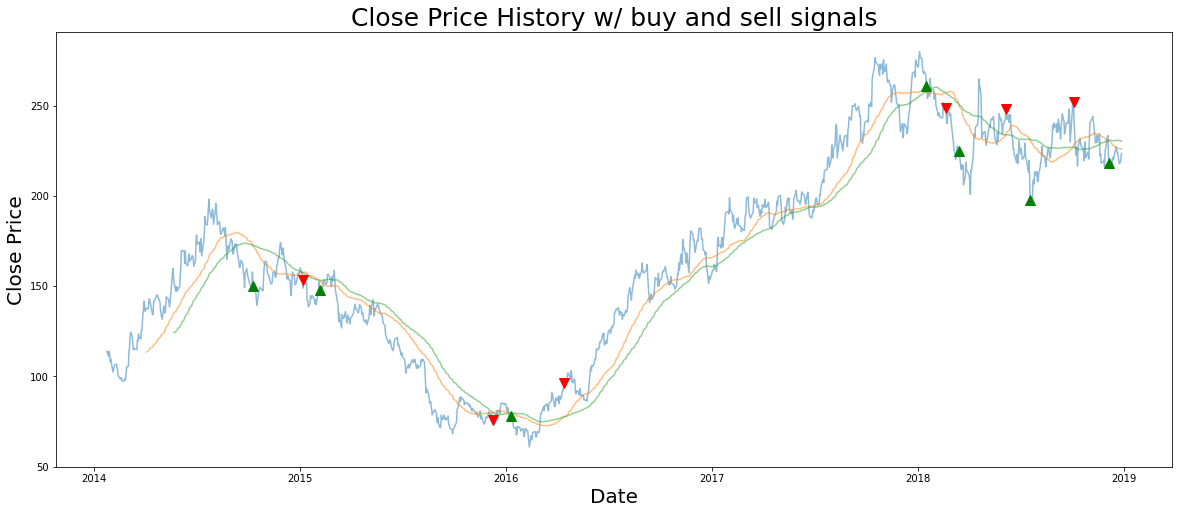

,datetime,close,high,low,open,volume,instrument,sma20,sma50,Signal,Position,Buy,Sell,sma100,sma80
2014-01-24,2014-01-24,114.00,115.35,113.00,113.15,5737135.0,HINDALCO,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2014-01-27,2014-01-27,111.10,112.70,109.30,112.00,8724577.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-28,2014-01-28,113.80,115.00,109.75,110.00,4513345.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-29,2014-01-29,111.75,114.75,111.15,114.50,4713458.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-30,2014-01-30,108.10,110.70,107.60,110.20,5077231.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21,224.00,227.45,221.80,224.25,6933691.0,HINDALCO,226.302,230.711250,1,0.0,NaN,NaN,227.9685,230.711250
2018-12-24,2018-12-24,217.85,224.00,216.95,224.00,4667022.0,HINDALCO,226.121,230.658125,1,0.0,NaN,NaN,228.0570,230.658125
2018-12-26,2018-12-26,218.60,219.80,212.90,213.85,6554865.0,HINDALCO,226.163,230.512500,1,0.0,NaN,NaN,228.1775,230.512500
2018-12-27,2018-12-27,220.60,223.90,219.60,221.40,7947144.0,HINDALCO,226.041,230.282500,1,0.0,NaN,NaN,228.2495,230.282500


In [105]:
excel_dataframe['sma20'] = sma(excel_dataframe, 50)
excel_dataframe['sma80'] = sma(excel_dataframe, 80)

#visually show the close price with the sma and buy and sell signal

#get the buy and sell signals

excel_dataframe['Signal'] = np.where(excel_dataframe['sma20'] < excel_dataframe['sma80'], 1 ,0 )
excel_dataframe['Position'] = excel_dataframe['Signal'].diff()
excel_dataframe['Buy'] = np.where(excel_dataframe['Position'] == 1, excel_dataframe['close'] ,np.NAN )
excel_dataframe['Sell'] = np.where(excel_dataframe['Position'] == -1, excel_dataframe['close'] ,np.NAN )


plt.figure(figsize=(20,8))
plt.title('Close Price History w/ buy and sell signals', fontsize= 25)
plt.plot(excel_dataframe['close'], alpha = 0.5 , label = 'close')
plt.plot(excel_dataframe['sma20'], alpha = 0.5 , label = 'sma20')
plt.plot(excel_dataframe['sma50'], alpha = 0.5 , label = 'sma50')
plt.plot(excel_dataframe.index, excel_dataframe['Buy'], alpha = 1 , label = 'Buy signal', marker = '^', color = 'green', markersize = 10)
plt.plot(excel_dataframe.index, excel_dataframe['Sell'], alpha = 1 , label = 'Sell signal', marker = 'v', color = 'red' ,markersize = 10)

plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize = 20)
plt.show()

excel_dataframe


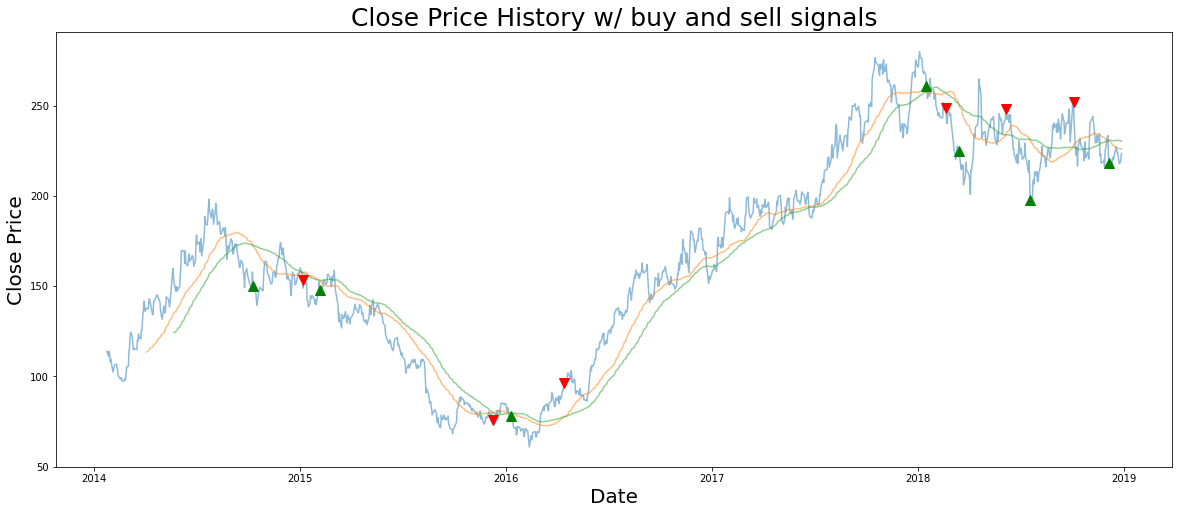

,datetime,close,high,low,open,volume,instrument,sma20,sma50,Signal,Position,Buy,Sell,sma100,sma80
2014-01-24,2014-01-24,114.00,115.35,113.00,113.15,5737135.0,HINDALCO,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2014-01-27,2014-01-27,111.10,112.70,109.30,112.00,8724577.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-28,2014-01-28,113.80,115.00,109.75,110.00,4513345.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-29,2014-01-29,111.75,114.75,111.15,114.50,4713458.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
2014-01-30,2014-01-30,108.10,110.70,107.60,110.20,5077231.0,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21,224.00,227.45,221.80,224.25,6933691.0,HINDALCO,226.302,230.711250,1,0.0,NaN,NaN,227.9685,230.711250
2018-12-24,2018-12-24,217.85,224.00,216.95,224.00,4667022.0,HINDALCO,226.121,230.658125,1,0.0,NaN,NaN,228.0570,230.658125
2018-12-26,2018-12-26,218.60,219.80,212.90,213.85,6554865.0,HINDALCO,226.163,230.512500,1,0.0,NaN,NaN,228.1775,230.512500
2018-12-27,2018-12-27,220.60,223.90,219.60,221.40,7947144.0,HINDALCO,226.041,230.282500,1,0.0,NaN,NaN,228.2495,230.282500


In [106]:
#visually show the close price with the sma and buy and sell signal

plt.figure(figsize=(20,8))
plt.title('Close Price History w/ buy and sell signals', fontsize= 25)
plt.plot(excel_dataframe['close'], alpha = 0.5 , label = 'close')
plt.plot(excel_dataframe['sma20'], alpha = 0.5 , label = 'sma20')
plt.plot(excel_dataframe['sma50'], alpha = 0.5 , label = 'sma50')
plt.plot(excel_dataframe.index, excel_dataframe['Buy'], alpha = 1 , label = 'Buy signal', marker = '^', color = 'green', markersize = 10)
plt.plot(excel_dataframe.index, excel_dataframe['Sell'], alpha = 1 , label = 'Sell signal', marker = 'v', color = 'red' ,markersize = 10)

plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price',fontsize = 20)
plt.show()

excel_dataframe

# Unit testing

In [77]:
import datetime
import unittest
import pandas as pd


def get_stock_data():
    """pull data from stooq"""
    df = excel_dataframe.copy()
    return df

class TestGetStockData(unittest.TestCase):
    @classmethod
    def test_columns_present(self):
        #ensures that the expected columns are all present
        self.assertIn("Open", self.df.columns)
        self.assertIn("High", self.df.columns)
        self.assertIn("Low", self.df.columns)
        self.assertIn("Close", self.df.columns)
        self.assertIn("Volume", self.df.columns)

    def test_non_empty(self):
        #ensures that there is more than one row of data
        self.assertNotEqual(len(self.df.index), 0)

    def test_high_low(self):
        #ensure high and low are the highest and lowest in the same row
        ohlc = self.df[["Open","High","Low","Close"]]
        highest = ohlc.max(axis=1)
        lowest = ohlc.min(axis=1)
        self.assertTrue(ohlc.le(highest, axis=0).all(axis=None))
        self.assertTrue(ohlc.ge(lowest, axis=0).all(axis=None))

    def test_most_recent_within_week(self):
        #most recent data was collected within the last week
        most_recent_date = pd.to_datetime(self.df.index[-1])
        self.assertLessEqual((datetime.datetime.today() - most_recent_date).days, 7)

unittest.main()

#Result pops up the error as we are not meeting the result

usage: ipykernel_launcher.py [-h] [-v] [-q] [--locals] [-f] [-c] [-b]
                             [-k TESTNAMEPATTERNS]
                             [tests ...]
ipykernel_launcher.py: error: argument -f/--failfast: ignored explicit argument 'c:\\Users\\dvgrg\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-11832P6SXl8C1yolS.json'


AssertionError: 

# I have also used RSI trading strategy

In [107]:
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

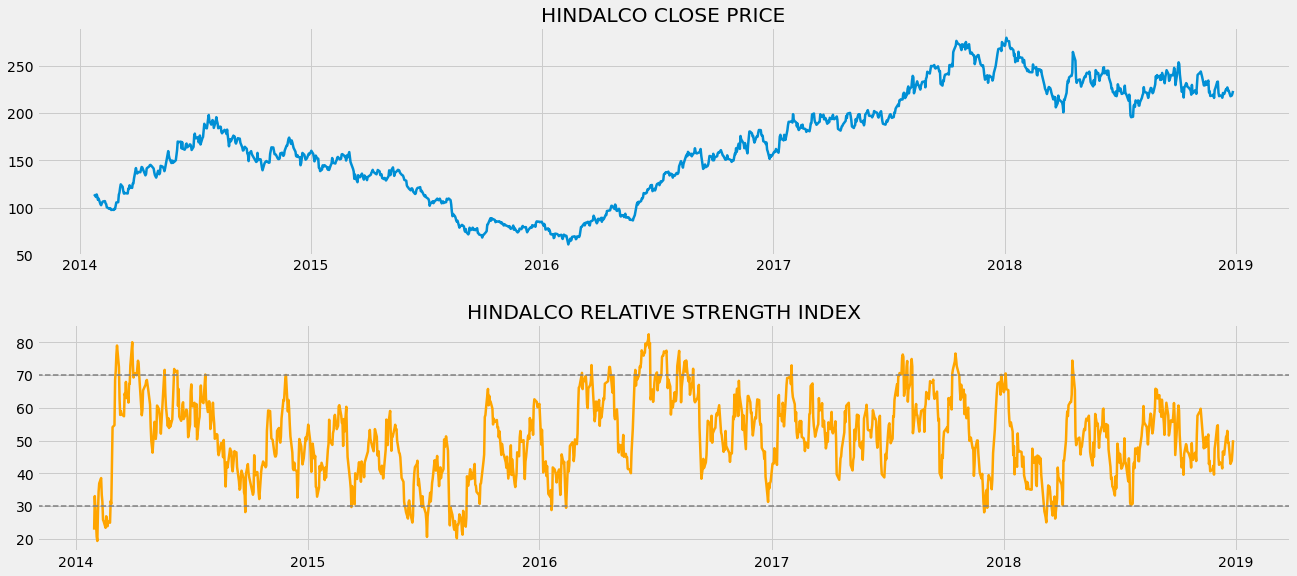

In [113]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

excel_dataframe['rsi_14'] = get_rsi(excel_dataframe['close'], 14)
hindalco_RSI = excel_dataframe.dropna()



#RSI Plot
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(excel_dataframe['close'], linewidth = 2.5)
ax1.set_title('HINDALCO CLOSE PRICE')
ax2.plot(excel_dataframe['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('HINDALCO RELATIVE STRENGTH INDEX')
plt.show()


In [114]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(excel_dataframe['close'], excel_dataframe['rsi_14'])



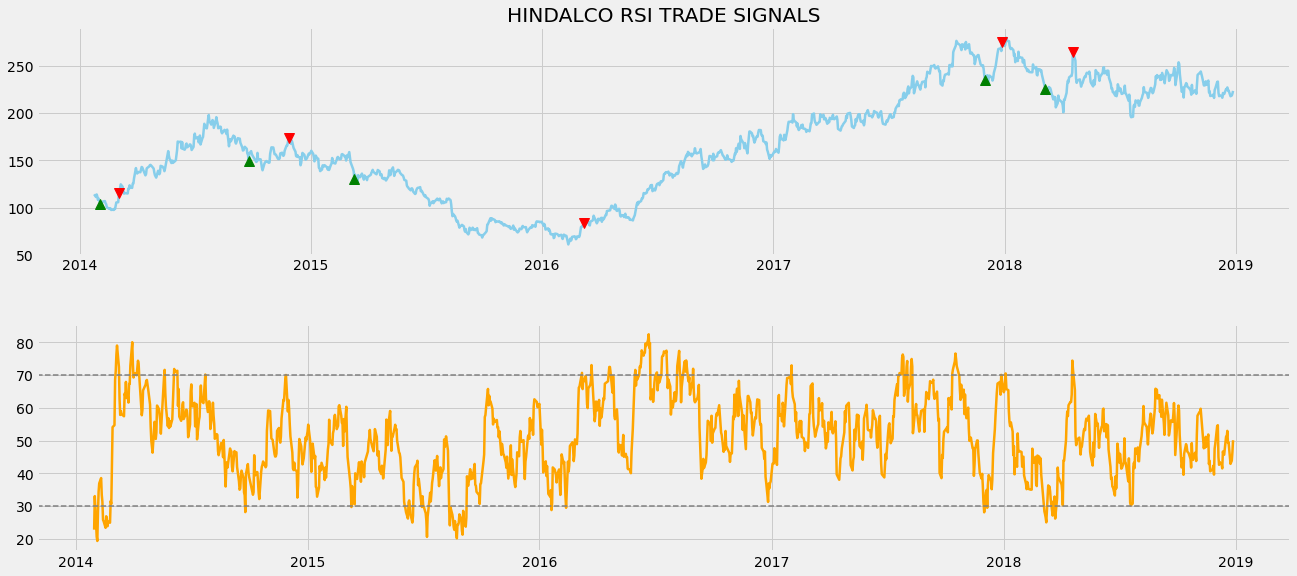

In [115]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(excel_dataframe['close'], linewidth = 2.5, color = 'skyblue', label = 'HINDALCO')
ax1.plot(excel_dataframe.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(excel_dataframe.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('HINDALCO RSI TRADE SIGNALS')
ax2.plot(excel_dataframe['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()
